### Anáilise Exploratório de dados para Machine Learning

 I- Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np


II- Pré - Processamento dos Dados

**Análise Exploratória de Dados**



> Essa análise exploratória tem como objetivo manipular os dados, analisar as características e potenciais contribuindo na análise de componentes principais para o Machine Learning.



1 - Carregando dados

In [ ]:
X_full = pd.read_csv('./sample_data/breast-cancer.csv') # X_full é a matriz com todos os dados
# X_teste = pd.read_csv('./sample_data/breast-cancer.csv') # X_full será a matriz com todos os dados alvos (teste de predição)

In [ ]:
display(X_full)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no




> Analisando previamente os dados, estamos tratando com dados categóricos e numéricos



In [ ]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
X_full.isna().sum() # Analisando se há dados nulos


Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64



> Daqui já retiramos como infromações que não há nenhum dado nulo



1.1 - Irei tentar obter algums informações referentes a frequencia dos dados:

In [ ]:
X_full.describe(include='all')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,286,286,286,286,286,286,286.000000,286,286,286
unique,2,6,3,11,7,3,NaN,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,NaN,left,left_low,no
freq,201,96,150,60,213,222,NaN,152,110,218
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.048951,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.738217,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN




> Aqui há alguns setores inderterminados, provavelmente por se tratar de dados categóricos. Aqui nessa análise sumarizamos pelas principais medidas descritivas.



deg-malig    Axes(0.125,0.11;0.775x0.77)
dtype: object

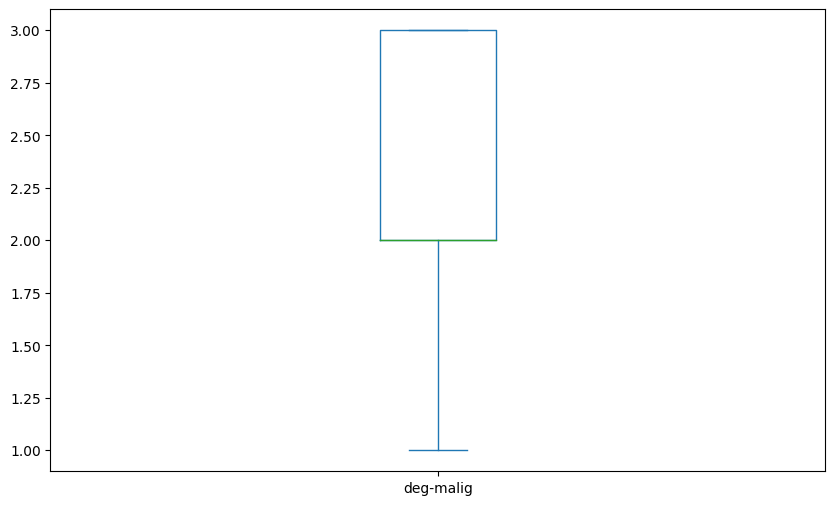

In [ ]:
X_full.plot(kind='box', figsize = (10, 6), subplots = True)

In [ ]:
X_full.describe(exclude=np.object) #Aqui conseguimos trazer uma análise mais precisas das distribuição de médias, medias, quantis dos dados numericos

<ipython-input-7-7dcbb93403d7>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_full.describe(exclude=np.object) #Aqui conseguimos trazer uma análise mais precisas das distribuição de médias, medias, quantis dos dados numericos


,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
X_full.describe(exclude=np.number)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,breast,breast-quad,irradiat
count,286,286,286,286,286,286,286,286,286
unique,2,6,3,11,7,3,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,left,left_low,no
freq,201,96,150,60,213,222,152,110,218


In [ ]:
Class = X_full.Class.value_counts()
age = X_full.age.value_counts()

In [ ]:
Class

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [ ]:
age

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64

II- Tratamento de variáveis categóricas nominais (Feature Engineering)

In [ ]:

#X = X_full.drop(['Class'], axis=1)
#y = X_full.Class


In [ ]:
print(X)

       age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0    30-39   premeno      30-34       0-2        no          3   left   
1    40-49   premeno      20-24       0-2        no          2  right   
2    40-49   premeno      20-24       0-2        no          2   left   
3    60-69      ge40      15-19       0-2        no          2  right   
4    40-49   premeno        0-4       0-2        no          2  right   
..     ...       ...        ...       ...       ...        ...    ...   
281  30-39   premeno      30-34       0-2        no          2   left   
282  30-39   premeno      20-24       0-2        no          3   left   
283  60-69      ge40      20-24       0-2        no          1  right   
284  40-49      ge40      30-34     5-Mar        no          3   left   
285  50-59      ge40      30-34     5-Mar        no          3   left   

    breast-quad irradiat  
0      left_low       no  
1      right_up       no  
2      left_low       no  
3       left_up



*   Exclusão ou Substituição
*   One - Hot Encoding



Dados categóricos do DataBase



*   Age
*   menopause
*   tumor-size
*   inv-nodes
*   breast-quad





In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_full, X_full, train_size=0.8, random_state=3)

In [ ]:
y_val

271       recurrence-events
159    no-recurrence-events
122    no-recurrence-events
38     no-recurrence-events
16     no-recurrence-events
67     no-recurrence-events
31     no-recurrence-events
109    no-recurrence-events
61     no-recurrence-events
207       recurrence-events
50     no-recurrence-events
198    no-recurrence-events
221       recurrence-events
73     no-recurrence-events
25     no-recurrence-events
58     no-recurrence-events
74     no-recurrence-events
166    no-recurrence-events
162    no-recurrence-events
98     no-recurrence-events
102    no-recurrence-events
161    no-recurrence-events
64     no-recurrence-events
108    no-recurrence-events
269       recurrence-events
127    no-recurrence-events
46     no-recurrence-events
66     no-recurrence-events
204       recurrence-events
196    no-recurrence-events
78     no-recurrence-events
82     no-recurrence-events
6      no-recurrence-events
253       recurrence-events
121    no-recurrence-events
232       recurrence

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.4 MB/s eta 0:00:00




> Irei tratar as categorias



In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
nominal_feature = list(X_full.select_dtypes(include='object').columns)


In [ ]:
print(nominal_feature)

['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']


In [ ]:
#one_hot_enc = OneHotEncoder(handle_unknown='ignore')
one_hot_enc = OneHotEncoder()

In [ ]:
print(one_hot_enc)

OneHotEncoder(handle_unknown='ignore')


In [ ]:
X_encoded_transform = one_hot_enc.fit_transform(X_full[['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']])
#X_encoded_train = one_hot_enc.fit_transform(X_train)
#X_encoded_val = one_hot_enc.fit_transform(X_val)
# analisar parte de teste

In [ ]:
print(X_encoded_transform)

     age_1  age_2  age_3  age_4  age_5  age_6  menopause_1  menopause_2  \
115      1      0      0      0      0      0            1            0   
220      0      1      0      0      0      0            0            1   
149      1      0      0      0      0      0            0            0   
179      0      1      0      0      0      0            0            1   
280      1      0      0      0      0      0            1            0   
..     ...    ...    ...    ...    ...    ...          ...          ...   
277      0      0      1      0      0      0            1            0   
256      0      1      0      0      0      0            0            1   
131      0      1      0      0      0      0            0            1   
249      0      0      0      1      0      0            0            1   
152      1      0      0      0      0      0            1            0   

     menopause_3  tumor-size_1  ...  breast_1  breast_2  breast-quad_1  \
115            0         

In [ ]:
one_hot_enc.get_feature_names_out()

array(['age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69',
       'age_70-79', 'menopause_ge40', 'menopause_lt40',
       'menopause_premeno', 'tumor-size_0-4', 'tumor-size_14-Oct',
       'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29',
       'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44',
       'tumor-size_45-49', 'tumor-size_50-54', 'tumor-size_9-May',
       'inv-nodes_0-2', 'inv-nodes_11-Sep', 'inv-nodes_14-Dec',
       'inv-nodes_15-17', 'inv-nodes_24-26', 'inv-nodes_5-Mar',
       'inv-nodes_8-Jun', 'node-caps_?', 'node-caps_no', 'node-caps_yes',
       'breast_left', 'breast_right', 'breast-quad_?',
       'breast-quad_central', 'breast-quad_left_low',
       'breast-quad_left_up', 'breast-quad_right_low',
       'breast-quad_right_up', 'irradiat_no', 'irradiat_yes'],
      dtype=object)

In [ ]:
X_encoded_transform.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
dframe_transform = pd.DataFrame(X_encoded_transform.toarray())
print(dframe_transform)

      0    1    2    3    4    5    6    7    8    9   ...   30   31   32  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
1    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
4    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  1.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
281  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
282  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
283  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
284  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
285  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   

      33   34   35   36   37   38   39  
0    0.0  1.0  0.0  0.0  0.0  1.0 

In [ ]:
dframe_transform.columns = one_hot_enc.get_feature_names_out()
dframe_transform.head()

,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,tumor-size_0-4,...,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
data = pd.concat([X_full,dframe_transform], axis = 1)
data

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,...,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
284,recurrence-events,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data = data.drop(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], axis=1)


In [ ]:
data

,Class,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,...,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,no-recurrence-events,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,no-recurrence-events,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,no-recurrence-events,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,no-recurrence-events,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,no-recurrence-events,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
282,recurrence-events,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
283,recurrence-events,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
284,recurrence-events,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
## Fazendo ordenação de grau de malignidade do cancer
ordinal_encod = OrdinalEncoder()
malig = ordinal_encod.fit_transform(data.deg_malig.values.reshape(-1,1))

### Análise de Correlação



> A análise de correlação tradicional, como a correlação de Pearson ou a correlação de Spearman, é mais utilizada para dados de variáveis numéricas. Porém, dado que estou lidando com variáveis categóricas nominais em sua grande predominancia, uma abordagem comum é usar tabelas de contingência e testes estatísticos para avaliar a associação entre essas variáveis



In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
cor = pd.DataFrame(X_full)

contingency_table = pd.crosstab(cor['Class'], cor['age'])
chi2, p, _, _ = chi2_contingency(contingency_table)
contingency_table


age,20-29,30-39,40-49,50-59,60-69,70-79
Class,,,,,,
no-recurrence-events,1,21,63,71,40,5
recurrence-events,0,15,27,25,17,1


In [ ]:
chi2

3.9977394503232015

Tivemos um valor alto, já que o limiar é 0.5. Podemos dividir a idade em dois aspéctos, o quanto ela influencia na surgencia do cancer, e a probabilidade de cancer maligno dependendo da idade e outros fatores

menopause	tumor-size	inv-nodes	node-caps	deg-malig	breast	breast-quad	irradiat

In [ ]:
contingency_table = pd.crosstab(cor['Class'], cor['menopause'])
chi2, p, _, _ = chi2_contingency(contingency_table)
contingency_table


menopause,ge40,lt40,premeno
Class,,,
no-recurrence-events,94,5,102
recurrence-events,35,2,48


In [ ]:
chi2

0.7914599162353821



> Deve levar em consideração que foram feitas análise com apenas 36 mulheres no intervalo de 30-39 anos, e que destas analisadas, 15 tiveram a recorrencia de cancer, com cerca de 41.6% das tais. Ou seja, apesar do lt40 acusar um valor baixo para idades antes dos 40, este valor não pode ser levado tão a sério, dado que a análise foi feita com uma quantidade massiva pequena de pessoas nesse intervalo de idade, 37 ao todo (contando com a não recorencia entre idade de 20-29 anos)



In [ ]:
contingency_table = pd.crosstab(cor['age'], cor['tumor-size'])
chi2, p, _, _ = chi2_contingency(contingency_table)
contingency_table


tumor-size,0-4,14-Oct,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,9-May
age,,,,,,,,,,,
20-29,0,0,0,0,0,0,1,0,0,0,0
30-39,2,2,5,6,6,7,3,4,0,0,1
40-49,2,8,5,21,18,20,7,5,1,2,1
50-59,3,9,10,14,21,20,7,8,0,3,1
60-69,0,8,9,8,9,13,1,3,2,3,1
70-79,1,1,1,1,0,0,0,2,0,0,0


In [ ]:
chi2

50.92977705777602

In [ ]:
contingency_table = pd.crosstab(cor['age'], cor['deg-malig'])
chi2, p, _, _ = chi2_contingency(contingency_table)
contingency_table


deg-malig,1,2,3
age,,,
20-29,0,1,0
30-39,7,17,12
40-49,18,48,24
50-59,25,39,32
60-69,17,24,16
70-79,4,1,1


In [ ]:
chi2

11.56575017442114



> Comparando o grau de magnitude e a idade. É mais comum ter o grau 2 nas idaades entre 30-49 anos, e ser melhor distribuido na idaade entre 50-59



In [ ]:
contingency_table = pd.crosstab(cor['age'], cor['breast-quad'])
chi2, p, _, _ = chi2_contingency(contingency_table)
contingency_table


breast-quad,?,central,left_low,left_up,right_low,right_up
age,,,,,,
20-29,0,0,0,0,0,1
30-39,0,5,14,10,4,3
40-49,0,3,33,31,11,12
50-59,1,8,38,32,6,11
60-69,0,4,24,22,2,5
70-79,0,1,1,2,1,1


In [ ]:
chi2

22.00456381862445

In [ ]:
contingency_table = pd.crosstab(cor['age'], cor['irradiat'])
chi2, p, _, _ = chi2_contingency(contingency_table)
contingency_table

irradiat,no,yes
age,,
20-29,1,0
30-39,26,10
40-49,64,26
50-59,81,15
60-69,41,16
70-79,5,1


In [ ]:
chi2

22.00456381862445